In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Housing.csv')

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


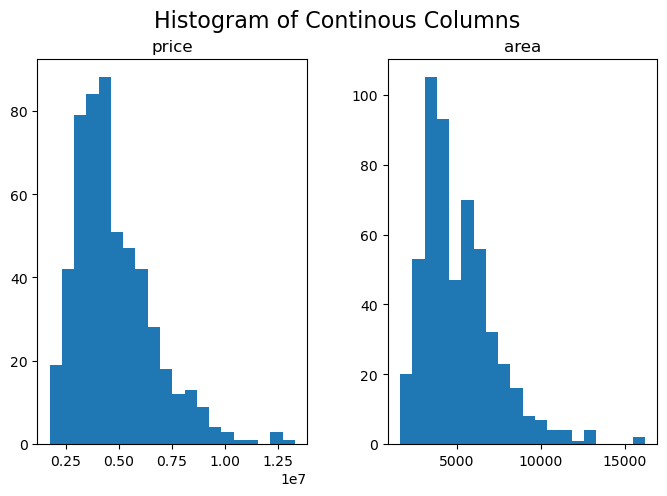

In [6]:
# Data Visualisation
df[['price','area']].hist(bins=20,figsize=(8,5),grid=False)
plt.suptitle('Histogram of Continous Columns',fontsize=16)
plt.show()


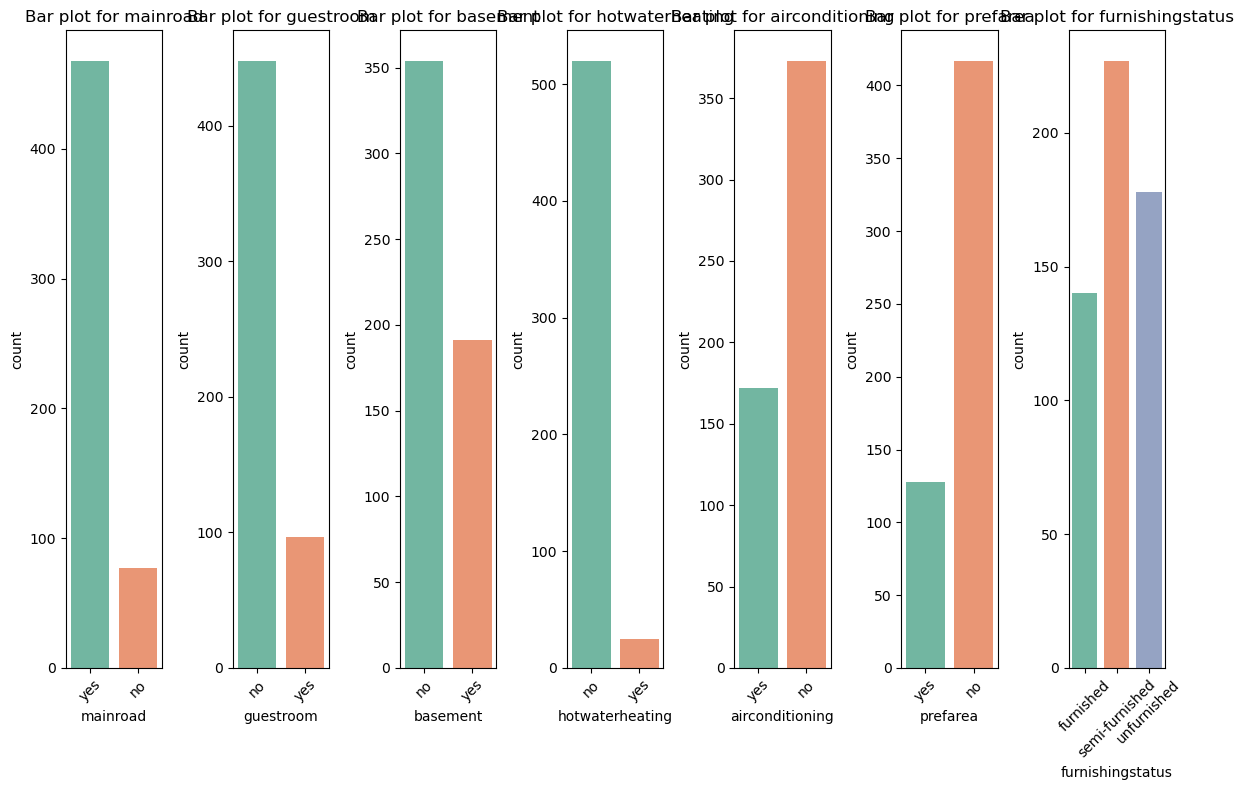

In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Plotting the bar plots for each categorical variable
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i+1)  # Arrange subplots horizontally
    sns.countplot(x=col, data=df, palette='Set2')  # Bar plot for each categorical column
    plt.title(f'Bar plot for {col}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust subplots to fit the figure area
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='price'>

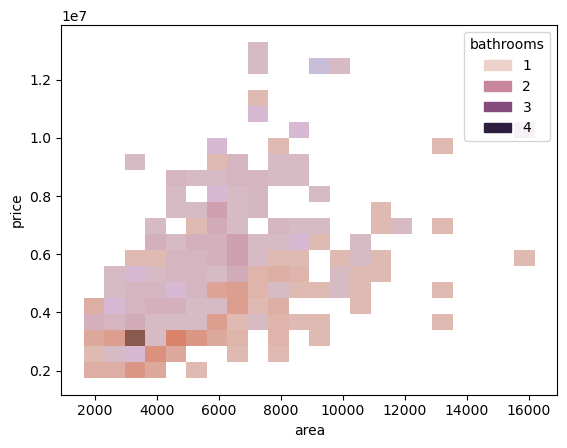

In [79]:
sns.histplot(data=df,x='area',y='price',hue='bathrooms')

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i]=le.fit_transform(df[i])
df    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [9]:
corr_mat=df.corr()

In [10]:
corr_mat

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<Axes: >

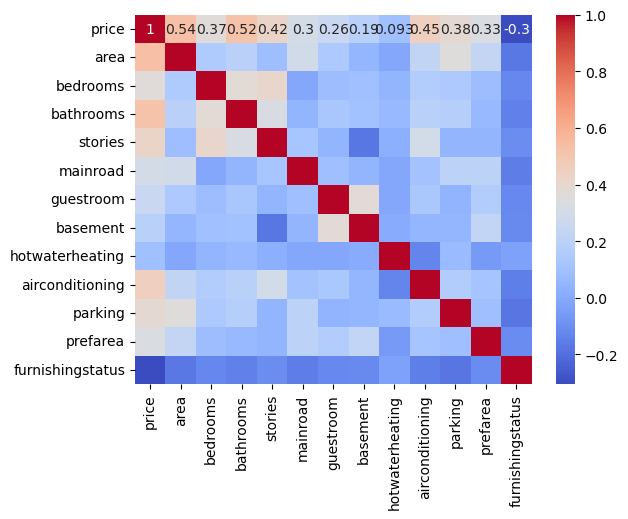

In [11]:
sns.heatmap(corr_mat,annot=True,fmt='.2g',cmap='coolwarm')

# Feature Importance

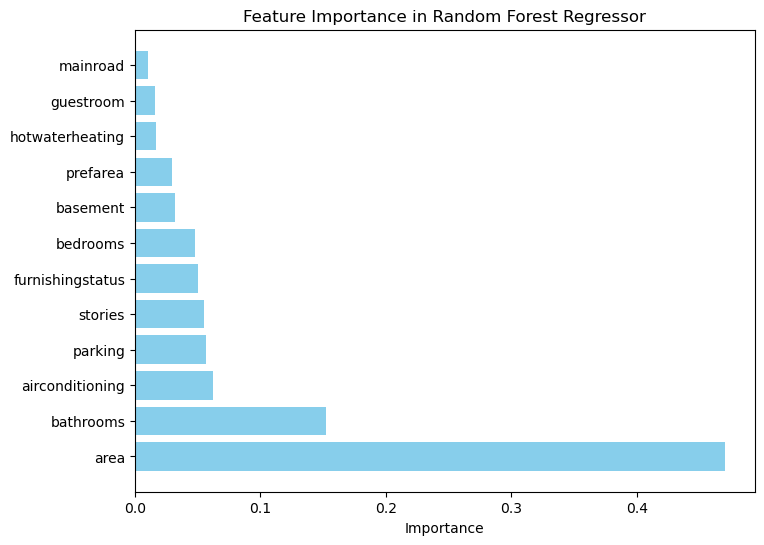

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plotting the feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

# Scaling

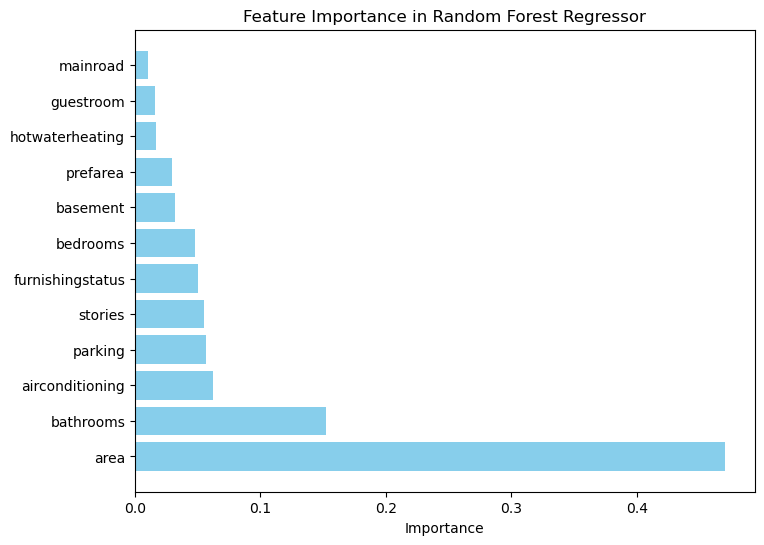

In [15]:
df1=df.copy()
df1['area']=np.log(df1['area'])
X = df1.drop(columns=['price'])
y = df1['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plotting the feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

(array([  8.,  20.,  68., 131.,  89., 104.,  79.,  29.,  11.,   6.]),
 array([7.40853057, 7.63695416, 7.86537776, 8.09380135, 8.32222495,
        8.55064854, 8.77907214, 9.00749573, 9.23591933, 9.46434293,
        9.69276652]),
 <BarContainer object of 10 artists>)

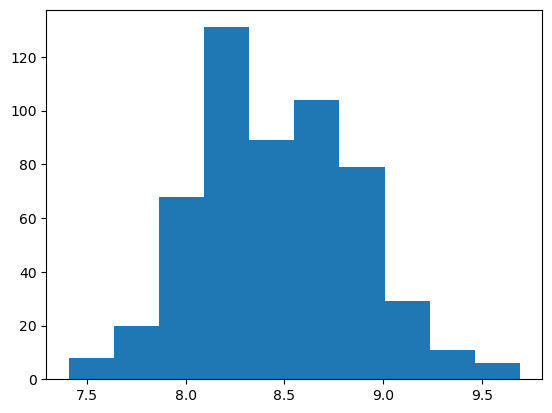

In [16]:
plt.hist(x='area',data=df1)

<Axes: >

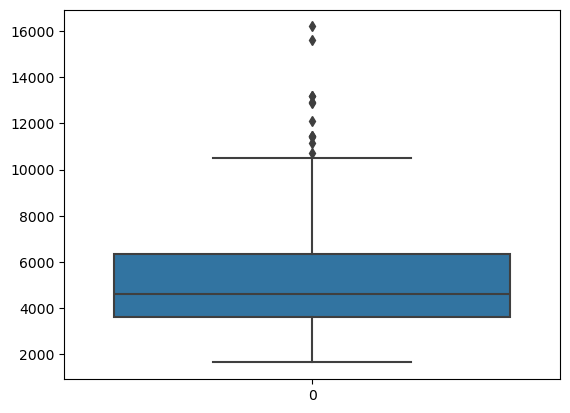

In [17]:
sns.boxplot(df['area'])

## Since outliers are present we'll use robust scaling method in the models where ever scaling is required

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
def evaluate(model,x_tr,y_tr,x_te,y_te):
    model.fit(x_tr,y_tr)
    y_pred_test=model.predict(x_te)
    y_pred_train=model.predict(x_tr)
    # Evaluate results 
    r2_t=r2_score(y_test,y_pred_test)
    r2_tr=r2_score(y_train,y_pred_train)
    mean_abs=mean_absolute_error(y_test,y_pred_test)
    mean_sq=mean_squared_error(y_test,y_pred_test)
    return {'R2_score of Testing Data':r2_t,'R2_score of training data':r2_tr,'Mean absolute error':mean_abs,'Mean squared error':mean_sq,'RMSE':mean_sq ** 0.5}    

# Training the models

In [22]:
results={}

In [23]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
lg = LinearRegression()
rs=RobustScaler()
x=df.drop(columns=['price'])
y=df['price']
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42)
X_train=rs.fit_transform(X_train)
x_test=rs.fit_transform(x_test)
results['Linear Regression']=evaluate(lg,X_train,y_train,x_test,y_test)


In [24]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
results['KNN Regressor']=evaluate(model,X_train,y_train,x_test,y_test)

In [25]:
# SVR
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
results['SVR']=evaluate(model,X_train,y_train,x_test,y_test)

In [26]:
# Ridge Regression
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)  # alpha is the regularization strength
results['Ridge Regression']=evaluate(model,X_train,y_train,x_test,y_test)

In [27]:
# Lasso Regression
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)  # alpha is the regularization strength
results['Lasso Regression']=evaluate(model,X_train,y_train,x_test,y_test)

In [28]:
#ElasticNet Regression - Both lasso and ridge
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha and l1_ratio are regularization parameters
results['Elastic Net Regression']=evaluate(model,X_train,y_train,x_test,y_test)

In [29]:
# XGBooster
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)
results['XGBooster']=evaluate(model,X_train,y_train,x_test,y_test)

In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
X=df.drop(columns=['price'])
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42)
model = DecisionTreeRegressor(max_depth=5)  # Limiting depth helps to reduce overfitting
results['Decision Tree Regressor']=evaluate(model,x_train,y_train,x_test,y_test)

In [31]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
results['Random Forest Regressor']=evaluate(model,x_train,y_train,x_test,y_test)

In [32]:
results_df=pd.DataFrame(results).T
results_df

,R2_score of Testing Data,R2_score of training data,Mean absolute error,Mean squared error,RMSE
Linear Regression,0.604515,0.687082,9.065007e+05,1.679078e+12,1.295793e+06
KNN Regressor,0.516523,0.745540,1.010728e+06,2.052659e+12,1.432710e+06
SVR,-0.059228,-0.048702,1.571949e+06,4.497081e+12,2.120632e+06
Ridge Regression,0.603231,0.687048,9.082640e+05,1.684529e+12,1.297894e+06
Lasso Regression,0.604515,0.687082,9.065009e+05,1.679079e+12,1.295793e+06
Elastic Net Regression,0.475630,0.601397,1.070064e+06,2.226276e+12,1.492071e+06
XGBooster,0.501712,0.943244,1.052696e+06,2.115544e+12,1.454491e+06
Decision Tree Regressor,0.340591,0.756629,1.126338e+06,2.799603e+12,1.673202e+06
Random Forest Regressor,0.581203,0.948944,9.476891e+05,1.778053e+12,1.333437e+06


In [33]:
lg=LinearRegression()
x=df['area']
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
r2_score(y_test,y_pred)

0.2094591923226028

<Axes: xlabel='area', ylabel='price'>

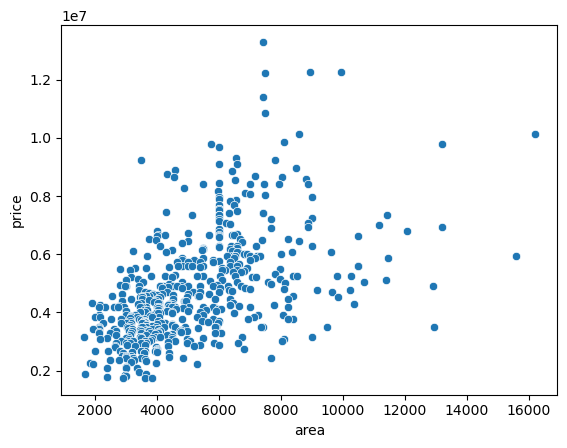

In [34]:
sns.scatterplot(x='area',y='price',data=df)

In [35]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [36]:
model=LinearRegression()
rs=RobustScaler()
x=df.drop(columns=['price'])
y=df['price']
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42)
X_train=rs.fit_transform(X_train)
x_test=rs.fit_transform(x_test)
model.fit(X_train,y_train)

LinearRegression()

Selected Features using Lasso Regression:
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')
Mean Squared Error: 1771751116594.0344
R2 Score: 0.6494754192267804


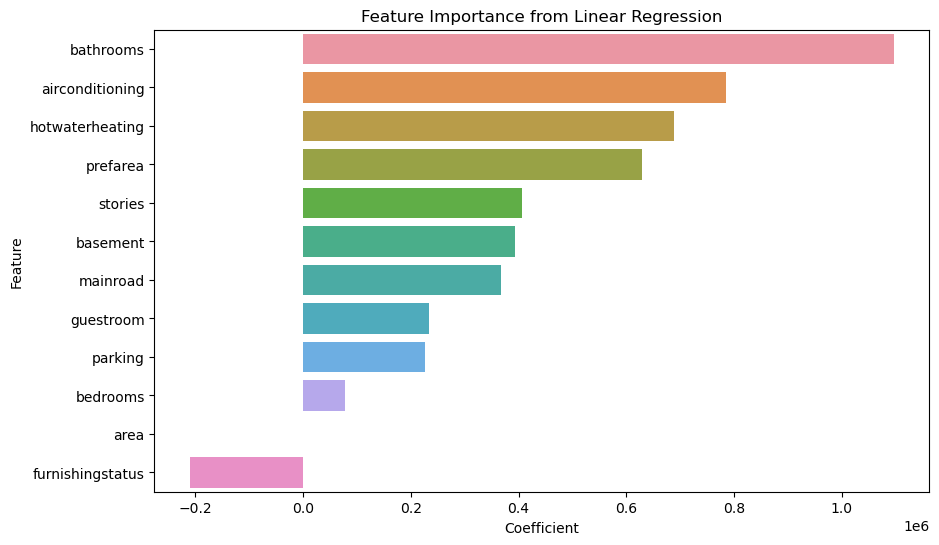

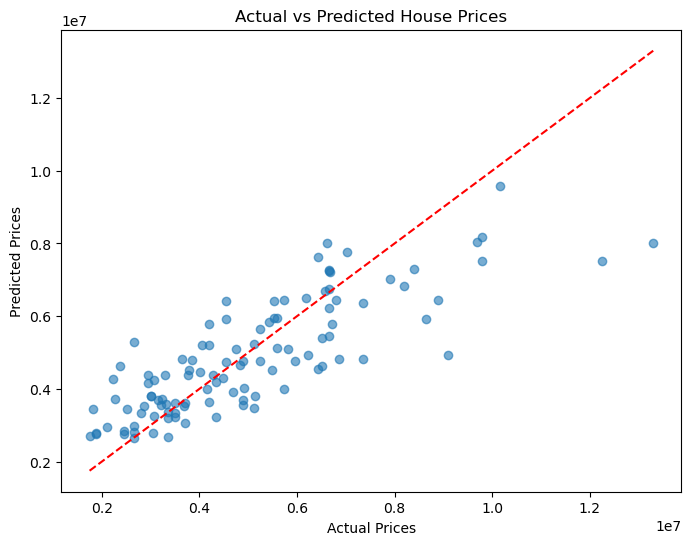

In [37]:
from sklearn.preprocessing import StandardScaler

X=df.drop('price',axis=1)
y=df['price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso regression for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

# Get selected features from Lasso
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso Regression:")
print(selected_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Feature importance plot
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance from Linear Regression")
plt.show()

# Actual vs Predicted prices plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


# One Hot Encoding

In [91]:
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [95]:
encoded_df=pd.get_dummies(df,drop_first=True,dtype='int')
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [139]:
results_ohe={}

In [143]:
# Linear Regression

lg = LinearRegression()
rs=RobustScaler()
x=encoded_df.drop(columns=['price'])
y=encoded_df['price']
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42)
X_train=rs.fit_transform(X_train)
x_test=rs.fit_transform(x_test)
results_ohe['Linear Regression']=evaluate(lg,X_train,y_train,x_test,y_test)

# Ridge Regression

model = Ridge(alpha=1.0)  # alpha is the regularization strength
results_ohe['Ridge Regression']=evaluate(model,X_train,y_train,x_test,y_test)

# Lasso Regression

model = Lasso(alpha=0.1)  # alpha is the regularization strength
results_ohe['Lasso Regression']=evaluate(model,X_train,y_train,x_test,y_test)

# XGBooster
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)
results_ohe['XGBooster']=evaluate(model,X_train,y_train,x_test,y_test)

In [145]:
r_ohe=pd.DataFrame(results_ohe).T
r_ohe

,R2_score of Testing Data,R2_score of training data,Mean absolute error,Mean squared error,RMSE
Linear Regression,0.605785,0.687522,9.050959e+05,1.673688e+12,1.293711e+06
Ridge Regression,0.604520,0.687487,9.068468e+05,1.679060e+12,1.295785e+06
Lasso Regression,0.605785,0.687522,9.050960e+05,1.673688e+12,1.293711e+06
XGBooster,0.503066,0.940545,1.048063e+06,2.109794e+12,1.452513e+06


In [115]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [149]:

rf=RandomForestRegressor()
param_grid = {'n_estimators': [10,15,20,23,25,30,50,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4, 10],  
    'n_jobs': [-1] 
}

random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=100,  
    cv=5,  
    verbose=2, 
    n_jobs=-1,  
    random_state=42,
    scoring='r2'
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

Best Parameters:  {'n_jobs': -1, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best Score:  0.6140372774919441


In [151]:
y_pred_test=random_search.predict(x_test)
y_pred_train=random_search.predict(X_train)
print(f'r2 of training data : {r2_score(y_train,y_pred_train)}')
print(f'r2 of testing data : {r2_score(y_test,y_pred_test)}')

r2 of training data : 0.9301560019080136
r2 of testing data : 0.4691921718640253


In [153]:
lg.score(x_test,y_test)

0.6057850081059373